<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/initial-data-modelling/crypto_price_predictor_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install yfinance
!pip install prophet


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf

%matplotlib inline


# Date Input and Validation

In this section, we will implement a function that prompts the user to enter a date in the `YYYY-MM-DD` format. The function will validate the input and ensure that it is correctly formatted.

If the user enters an invalid date format, they will be given up to three attempts to enter a valid date. If they fail to provide a valid date after three attempts, the program will default to the date `2024-01-01`.

The function will then calculate the number of days from the entered (or defaulted) date to today's date.


In [114]:
from datetime import datetime

start_date='2017-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')

print(f"Today's date in YYYY-MM-DD format: {today_date}")

Today's date in YYYY-MM-DD format: 2024-11-13


In [115]:

# Declare slice_date as a global variable
slice_date = ''

# Function to validate date format and calculate period value
def get_period_value():
    global slice_date  # Use the global variable
    attempts = 0
    max_attempts = 3

    while attempts < max_attempts:
        # Ask user for slice date
        slice_date = input(f"To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after {start_date} but before {today_date}: ")

        # Validate the date format
        try:
            # Attempt to parse the date
            parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')
            break  # Exit the loop if the date is valid
        except ValueError:
            attempts += 1
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
            if attempts == max_attempts:
                print("Maximum attempts reached. Defaulting to 2024-01-01.")
                slice_date = '2024-01-01'
                parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')

    # Calculate the number of days from the slice date to today
    today = datetime.today()
    period_value = (today - parsed_date).days

    return period_value

In [116]:
period_value = get_period_value()
if period_value is not None:
    print(f"Number of days from {slice_date} to today: {period_value}")

To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after 2017-01-01 but before 2024-11-13: avineet
Invalid date format. Please enter the date in YYYY-MM-DD format.
To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after 2017-01-01 but before 2024-11-13: 2023-11-31
Invalid date format. Please enter the date in YYYY-MM-DD format.
To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after 2017-01-01 but before 2024-11-13: 2023-11-30
Number of days from 2023-11-30 to today: 349


In [117]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download('BTC-USD', start=start_date, end=today_date)
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
display(btc.head())
display(btc.tail())

# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-01-01 00:00:00+00:00,998.325012,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02 00:00:00+00:00,1021.750000,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03 00:00:00+00:00,1043.839966,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04 00:00:00+00:00,1154.729980,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05 00:00:00+00:00,1013.380005,1013.380005,1191.099976,910.416992,1156.729980,510199008


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-07 00:00:00+00:00,75904.859375,75904.859375,76943.117188,74480.421875,75637.085938,63467654989
2024-11-08 00:00:00+00:00,76545.476562,76545.476562,77252.750000,75648.742188,75902.835938,55176858003
2024-11-09 00:00:00+00:00,76778.867188,76778.867188,76932.765625,75773.789062,76556.187500,29009480361
2024-11-10 00:00:00+00:00,80474.187500,80474.187500,81474.421875,76565.429688,76775.546875,82570594495
2024-11-11 00:00:00+00:00,88701.484375,88701.484375,89604.500000,80283.250000,80471.414062,117966845037


In [118]:
btc.dropna(inplace=True)
crypto_data = btc.loc[:slice_date, 'Close']
display(crypto_data.head())
display(crypto_data.tail())


Ticker,BTC-USD
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


Ticker,BTC-USD
Date,
2023-11-26 00:00:00+00:00,37479.121094
2023-11-27 00:00:00+00:00,37254.167969
2023-11-28 00:00:00+00:00,37831.085938
2023-11-29 00:00:00+00:00,37858.492188
2023-11-30 00:00:00+00:00,37712.746094


<Axes: xlabel='Date'>

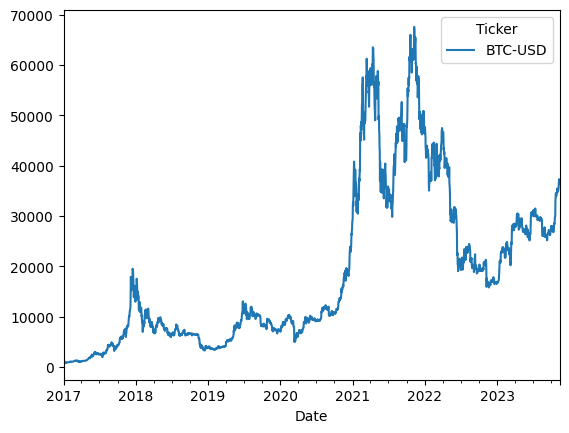

In [90]:
crypto_data.plot()

In [119]:
crypto_data = crypto_data.reset_index()


In [120]:
display(crypto_data.head())
display(crypto_data.tail())

Ticker,Date,BTC-USD
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,Date,BTC-USD
2520,2023-11-26 00:00:00+00:00,37479.121094
2521,2023-11-27 00:00:00+00:00,37254.167969
2522,2023-11-28 00:00:00+00:00,37831.085938
2523,2023-11-29 00:00:00+00:00,37858.492188
2524,2023-11-30 00:00:00+00:00,37712.746094


In [121]:
crypto_df = crypto_data.rename(columns={'Date':'ds', 'BTC-USD': 'y'})

In [122]:
display(crypto_df.head())
display(crypto_df.tail())

Ticker,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,ds,y
2520,2023-11-26 00:00:00+00:00,37479.121094
2521,2023-11-27 00:00:00+00:00,37254.167969
2522,2023-11-28 00:00:00+00:00,37831.085938
2523,2023-11-29 00:00:00+00:00,37858.492188
2524,2023-11-30 00:00:00+00:00,37712.746094


In [123]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2525 non-null   datetime64[ns, UTC]
 1   y       2525 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 39.6 KB


In [124]:
crypto_model = Prophet()

In [125]:
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/20ghr4zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph42srkge/1a8b6vfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12317', 'data', 'file=/tmp/tmph42srkge/20ghr4zy.json', 'init=/tmp/tmph42srkge/1a8b6vfb.json', 'output', 'file=/tmp/tmph42srkge/prophet_model20r0ci0y/prophet_model-20241113011547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [126]:
future_trends = crypto_model.make_future_dataframe(periods=period_value, freq="D")


In [127]:
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-2145.510304,-7057.280484,3056.650994,-2145.510304,-2145.510304,67.378933,67.378933,67.378933,-2.232033,-2.232033,-2.232033,69.610966,69.610966,69.610966,0.0,0.0,0.0,-2078.131371
1,2017-01-02,-2111.958448,-7026.230745,3572.827555,-2111.958448,-2111.958448,193.905397,193.905397,193.905397,10.116193,10.116193,10.116193,183.789204,183.789204,183.789204,0.0,0.0,0.0,-1918.053051
2,2017-01-03,-2078.406592,-7022.011269,3372.336490,-2078.406592,-2078.406592,287.920682,287.920682,287.920682,6.249777,6.249777,6.249777,281.670905,281.670905,281.670905,0.0,0.0,0.0,-1790.485910
3,2017-01-04,-2044.854736,-6913.858734,3690.478967,-2044.854736,-2044.854736,409.410223,409.410223,409.410223,47.892919,47.892919,47.892919,361.517305,361.517305,361.517305,0.0,0.0,0.0,-1635.444513
4,2017-01-05,-2011.302880,-6468.420210,3648.527657,-2011.302880,-2011.302880,397.152199,397.152199,397.152199,-24.822735,-24.822735,-24.822735,421.974934,421.974934,421.974934,0.0,0.0,0.0,-1614.150681


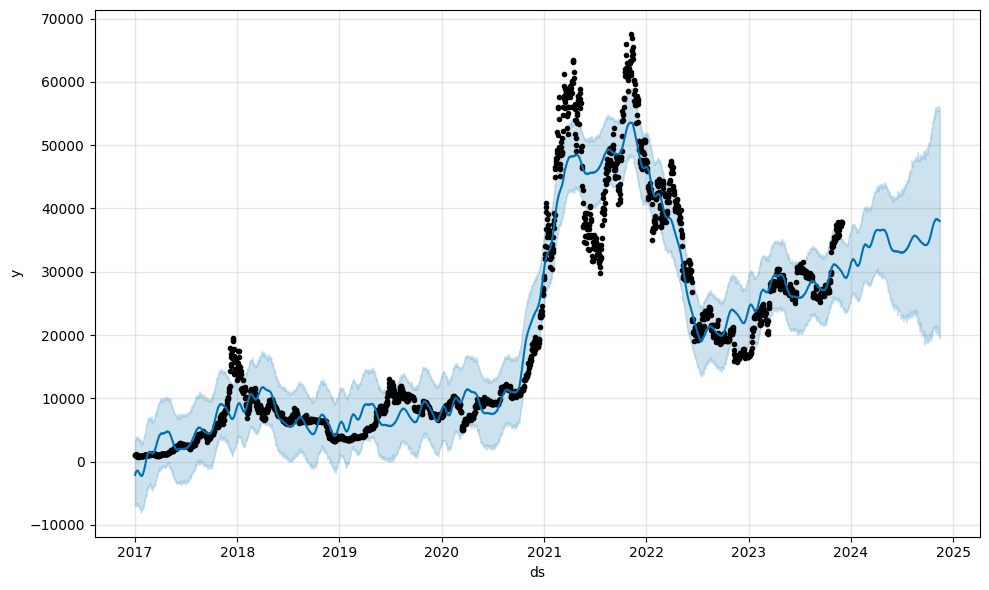

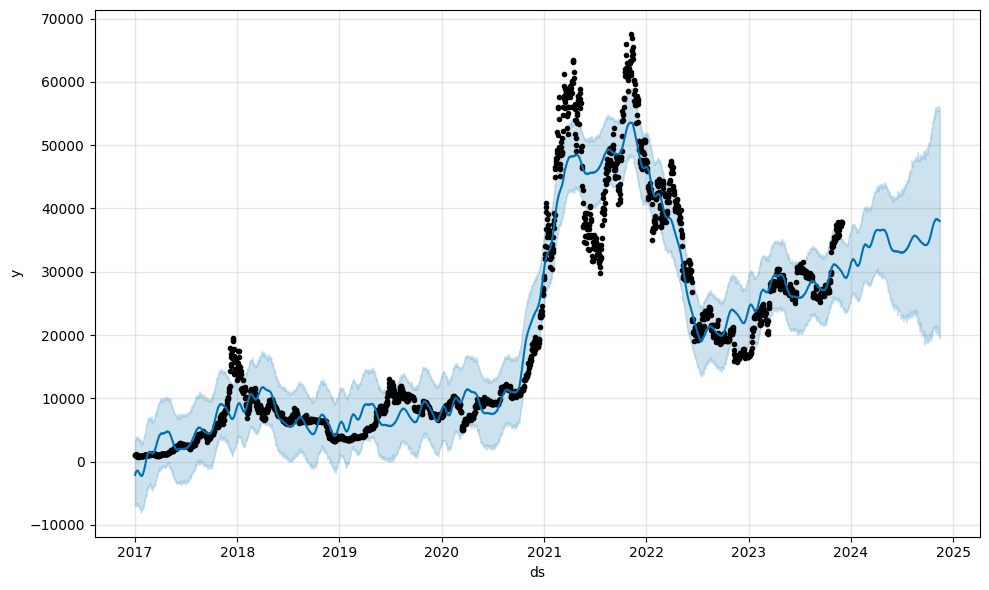

In [132]:
crypto_model.plot(forecast_trends)

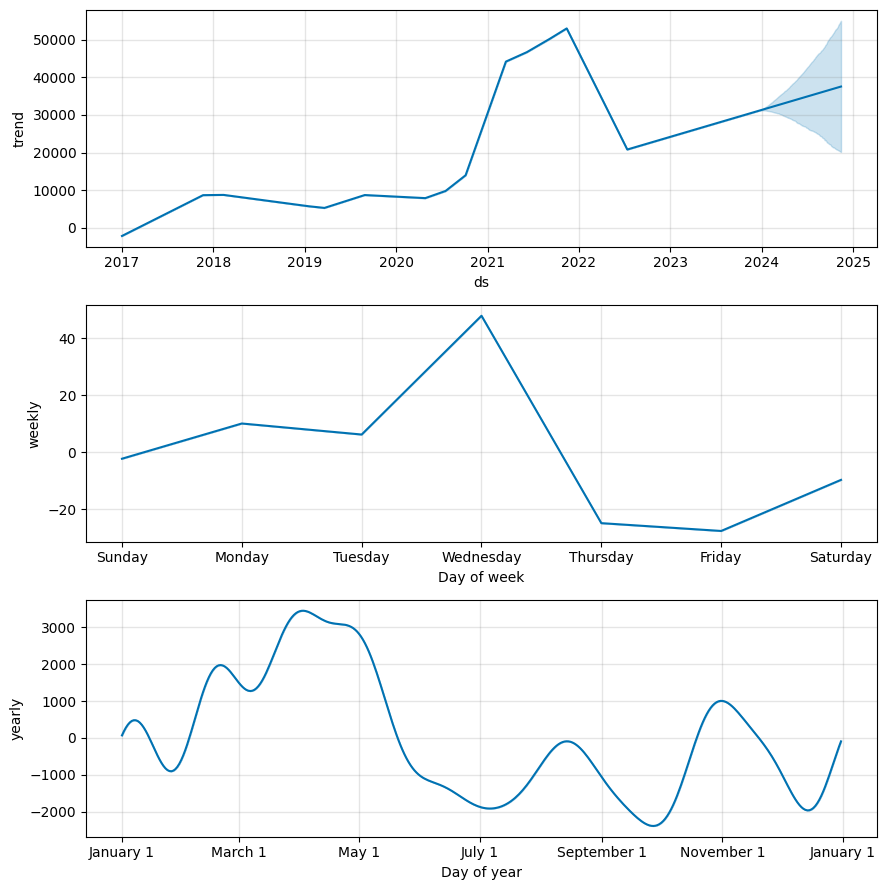

In [133]:
figures = crypto_model.plot_components(forecast_trends)

In [134]:
forecast_trends= forecast_trends[['ds','yhat']]

In [135]:
forecast_trends.set_index('ds', inplace=True)


In [136]:
# reduce the slice_date by period value into another variable

reduced_date = pd.to_datetime(slice_date) - pd.DateOffset(days=period_value)

# compare reduced_date with start_date and see which one is later and keep that date in reduced_date
if reduced_date < pd.to_datetime(start_date):
    reduced_date = pd.to_datetime(start_date)

reduced_date_str = reduced_date.strftime('%Y-%m-%d')
print(f"Reduced Date: {reduced_date_str} and Slice Date: {slice_date}")



Reduced Date: 2022-12-16 and Slice Date: 2023-11-30


In [137]:
forecast_dataframe = forecast_trends.loc[reduced_date:].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
display (forecast_dataframe.head())





,yhat
ds,
2022-12-16,21897.705618
2022-12-17,21969.791904
2022-12-18,22049.217949
2022-12-19,22151.160721
2022-12-20,22253.843489


In [138]:
real_values_for_compare_df = btc.loc[reduced_date_str:, 'Close'].copy()
# real_values_for_compare_df = real_values_for_compare_df.reset_index()
real_values_for_compare_df = real_values_for_compare_df.reset_index()
# real_2024.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)

real_values_for_compare_df['Date'] = real_values_for_compare_df['Date'].dt.tz_localize(None)

display(real_values_for_compare_df.head())

Ticker,Date,BTC-USD
0,2022-12-16,16647.484375
1,2022-12-17,16795.091797
2,2022-12-18,16757.976562
3,2022-12-19,16439.679688
4,2022-12-20,16906.304688


In [139]:
real_values_for_compare_df = real_values_for_compare_df.set_index('Date')


In [140]:
display(real_values_for_compare_df.head())
display(real_values_for_compare_df.tail())

Ticker,BTC-USD
Date,
2022-12-16,16647.484375
2022-12-17,16795.091797
2022-12-18,16757.976562
2022-12-19,16439.679688
2022-12-20,16906.304688


Ticker,BTC-USD
Date,
2024-11-07,75904.859375
2024-11-08,76545.476562
2024-11-09,76778.867188
2024-11-10,80474.187500
2024-11-11,88701.484375


In [141]:
# merge the 2 dataframes

merged_for_comparsion_df = real_values_for_compare_df.join(forecast_dataframe, how='inner')
display(merged_for_comparsion_df.head())
display(merged_for_comparsion_df.tail())


,BTC-USD,yhat
2022-12-16,16647.484375,21897.705618
2022-12-17,16795.091797,21969.791904
2022-12-18,16757.976562,22049.217949
2022-12-19,16439.679688,22151.160721
2022-12-20,16906.304688,22253.843489


,BTC-USD,yhat
2024-11-07,75904.859375,38189.905959
2024-11-08,76545.476562,38149.195878
2024-11-09,76778.867188,38125.873421
2024-11-10,80474.187500,38089.694802
2024-11-11,88701.484375,38056.885788


In [142]:
merged_for_comparsion_df.rename(columns={'BTC-USD':'Actual Price', 'yhat':'Predicted Price'}, inplace=True)
display(merged_for_comparsion_df)



,Actual Price,Predicted Price
2022-12-16,16647.484375,21897.705618
2022-12-17,16795.091797,21969.791904
2022-12-18,16757.976562,22049.217949
2022-12-19,16439.679688,22151.160721
2022-12-20,16906.304688,22253.843489
...,...,...
2024-11-07,75904.859375,38189.905959
2024-11-08,76545.476562,38149.195878
2024-11-09,76778.867188,38125.873421
2024-11-10,80474.187500,38089.694802


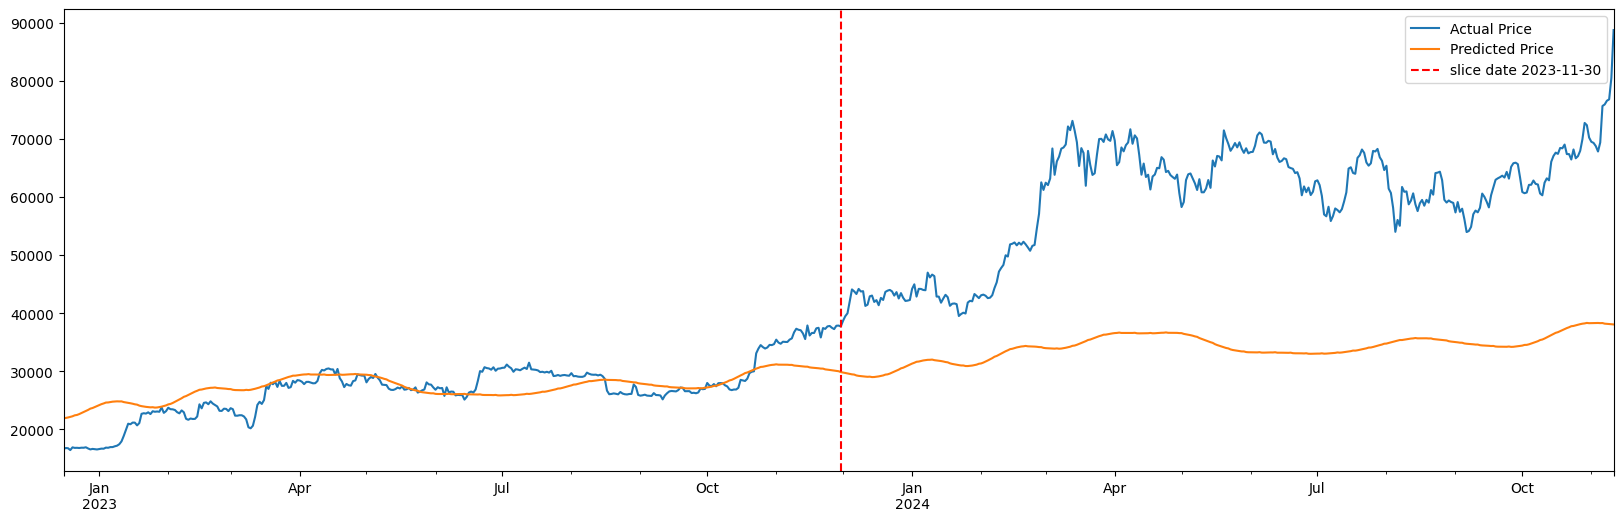

<Axes: >

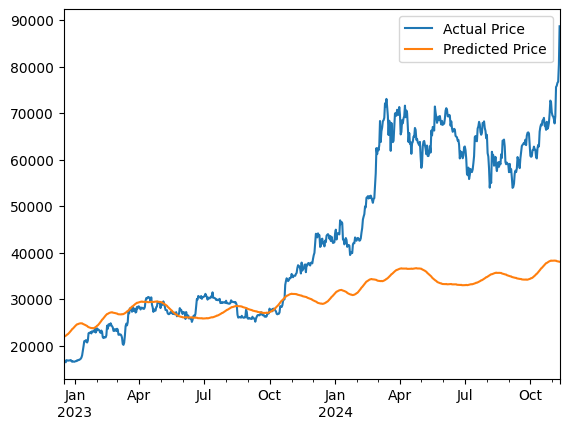

In [143]:
# Plot the DataFrame with a larger figure size
fig, ax = plt.subplots(figsize=(20, 6))  # Change the width and height as needed
merged_for_comparsion_df.plot(ax=ax)
label_date = f"slice date {slice_date}"
plt.axvline(x=pd.to_datetime(slice_date), color='red', linestyle='--', label=label_date)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()
merged_for_comparsion_df.plot()